**Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [2]:
import numpy as nup
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import cv2
from PIL import Image, ImageDraw, ImageFilter
import glob 
%matplotlib inline

**Original Image**

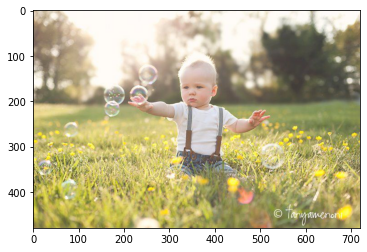

In [3]:
kid = Image.open('/content/drive/MyDrive/Computer Vision/Image Processing/Data/kid.jpg')
plt.imshow(kid)
plt.show()

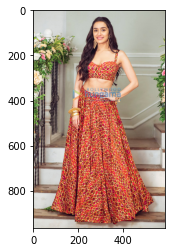

In [4]:
shraddha = Image.open('/content/drive/MyDrive/Computer Vision/Image Processing/Data/Shraddha.jpg')
plt.imshow(shraddha)
plt.show()

In [5]:
x = cv2.imread('/content/drive/MyDrive/Computer Vision/Image Processing/Data/Shraddha.jpg')
y = cv2.imread('/content/drive/MyDrive/Computer Vision/Image Processing/Data/kid.jpg')

In [6]:
import numpy as np
import os
import cv2

def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
   elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy

   elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy

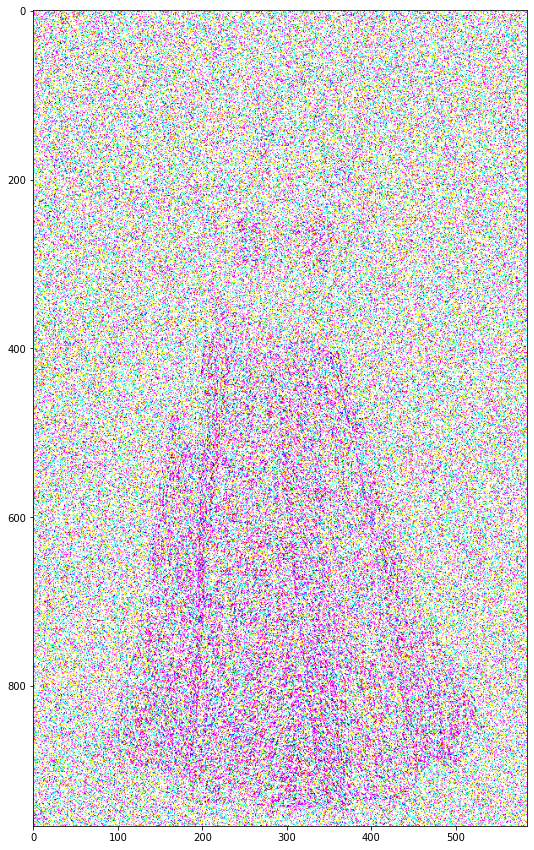

In [7]:
gyan1 = noisy('speckle', x)
plt.figure(figsize=(10,15))
plt.imshow(gyan1)
plt.show()

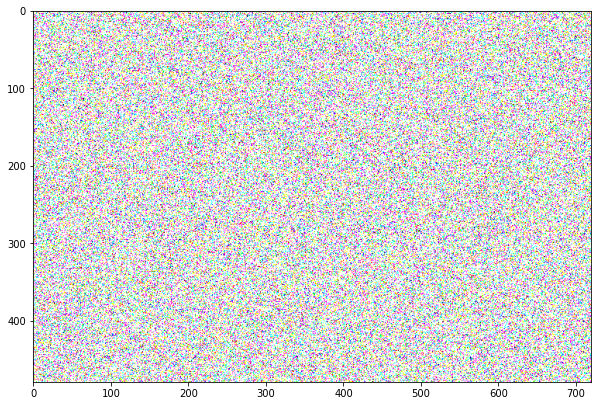

In [8]:
gyan2 = noisy('speckle', y)
plt.figure(figsize=(10,15))
plt.imshow(gyan2)
plt.show()